<a href="https://colab.research.google.com/github/nithinkt09/ma_exp/blob/main/imexp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

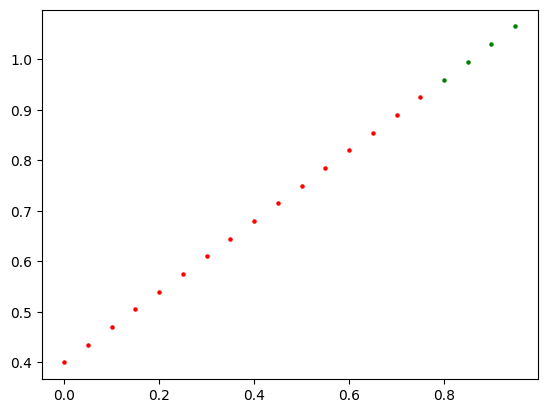

In [71]:
x = torch.arange(0, 1, 0.05, dtype=torch.float)
y = x * 0.7 + 0.4

train_len = int(len(x) * 0.8)

x_train, y_train = x[:train_len], y[:train_len]
x_test, y_test = x[train_len:], y[train_len:]

plt.scatter(x_train, y_train, c='r', s=5)
plt.scatter(x_test, y_test, c='g', s=5)

In [72]:
def plot_predictions(x_train, y_train, x_test, y_test, predictions=None):
    if predictions != None:
        plt.scatter(x_train, y_train, c='g', s=4, label='train_data')
        plt.scatter(x_test, y_test, c='b', s=20, label='test_data')
        plt.scatter(x_test, predictions, c='r', s=20, label='predictions', marker='x')
    else:
        plt.scatter(x_train, y_train, c='g', s=4, label='train_data')
        plt.scatter(x_test, y_test, c='b', s=8, label='test_data')

    plt.legend()
    plt.show()


In [73]:
class LinearModel(nn.Module):

    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear_net = nn.Sequential(
            nn.Linear(in_features=1, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=1),
            nn.ReLU()
        )

    def forward(self, x):
        return self.linear_net(x)

In [74]:
num_epoch = 100
model_0 = LinearModel()

train_loss = []
test_loss = []
epoch_count = []
diff_loss = []

criterion = nn.MSELoss()
optimizer = optim.SGD(params=model_0.parameters(), lr=0.1)
for epoch in range(num_epoch):
    model_0.train()
    optimizer.zero_grad()
    model_logits = model_0(x_train.unsqueeze(1))
    loss = criterion(model_logits, y_train.unsqueeze(1))

    loss.backward()
    optimizer.step()

    model_0.eval()
    if epoch %10 == 0:
        epoch_count.append(epoch)
        train_loss.append(loss.item())
        test_preds = model_0(x_test.unsqueeze(1))
        test_loss_eval = criterion(test_preds, y_test)
        test_loss.append(test_loss_eval.item())
        diff_loss.append(loss.item() - test_loss_eval.item())
        print(f'test_loss: {test_loss_eval.item()} | loss: {loss.item()}')

test_loss: 1.014665126800537 | loss: 0.45583438873291016
test_loss: 0.08839230239391327 | loss: 0.020981790497899055
test_loss: 0.08008315414190292 | loss: 0.018792513757944107
test_loss: 0.0725797712802887 | loss: 0.01677456870675087
test_loss: 0.06562875956296921 | loss: 0.014889663085341454
test_loss: 0.05914729833602905 | loss: 0.013116346672177315
test_loss: 0.05304102599620819 | loss: 0.01144393440335989
test_loss: 0.047316379845142365 | loss: 0.0098725575953722
test_loss: 0.04195338115096092 | loss: 0.008413075469434261
test_loss: 0.036954160779714584 | loss: 0.007074627559632063


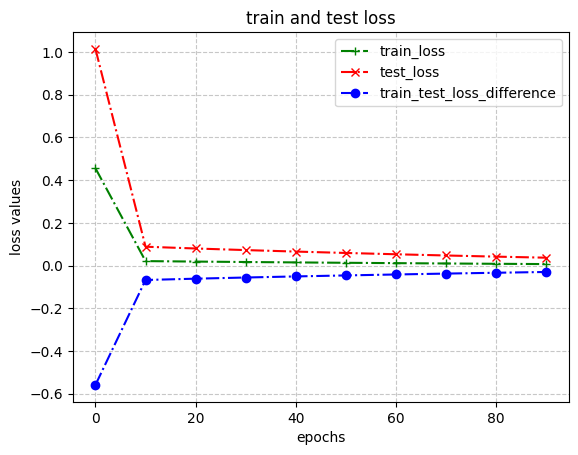

In [75]:
plt.plot(epoch_count, train_loss, label="train_loss", marker='+', c='g', linestyle='-.')
plt.plot(epoch_count, torch.Tensor(test_loss).cpu().numpy(), label="test_loss", marker='x', c='r', linestyle='-.')
plt.plot(epoch_count, torch.Tensor(diff_loss).cpu().numpy(), label="train_test_loss_difference", marker='o', c='b', linestyle='-.')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("train and test loss")
plt.xlabel("epochs")
plt.ylabel("loss values")
plt.legend()
plt.show()

model_state_dict: odict_items([('linear_net.0.weight', tensor([[ 0.8628],
        [-0.1590],
        [-0.2390],
        [-0.5838],
        [-0.6528],
        [ 0.9861],
        [ 0.1908],
        [-0.9897]])), ('linear_net.0.bias', tensor([ 0.6525, -0.2729, -0.5937, -0.8849,  0.3311, -0.7789,  0.8015, -0.5666])), ('linear_net.2.weight', tensor([[ 0.2795, -0.2731, -0.3343, -0.0390, -0.2026,  0.1097,  0.1615,  0.2142]])), ('linear_net.2.bias', tensor([0.2780]))])
model_parameters: [Parameter containing:
tensor([[ 0.8628],
        [-0.1590],
        [-0.2390],
        [-0.5838],
        [-0.6528],
        [ 0.9861],
        [ 0.1908],
        [-0.9897]], requires_grad=True), Parameter containing:
tensor([ 0.6525, -0.2729, -0.5937, -0.8849,  0.3311, -0.7789,  0.8015, -0.5666],
       requires_grad=True), Parameter containing:
tensor([[ 0.2795, -0.2731, -0.3343, -0.0390, -0.2026,  0.1097,  0.1615,  0.2142]],
       requires_grad=True), Parameter containing:
tensor([0.2780], requires_grad=Tr

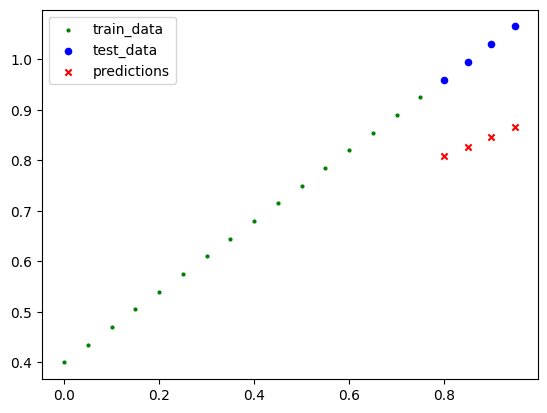

In [76]:
model_0.eval()
with torch.inference_mode():
    y_predictions = model_0(x_test.unsqueeze(1))

trained_01_dicts = model_0.state_dict()

print(f'model_state_dict: {trained_01_dicts.items()}')
print(f'model_parameters: {list(model_0.parameters())}')
torch.save(trained_01_dicts, 'trained_model_weights.pth')
torch.save(model_0, 'trained_model.pth')
plot_predictions(x_train, y_train, x_test, y_test, y_predictions)